# <code style="color:brown">Gesture Phase Segmentation</code>

## <code style="background:brown;color:white">1. Introduction</code>


Welcome to this notebook on Gesture Phase Segmentation! In this project, we will be working with the Gesture Phase Segmentation dataset from the UCI Machine Learning Repository. The dataset is designed for the task of segmenting hand gesture signals into different phases, providing a valuable resource for understanding and classifying temporal aspects of hand movements.

The dataset comprises hand gesture signals, each annotated with the corresponding gesture phase. Each gesture signal is represented as a time series of hand movement data, and the goal is to develop a model capable of accurately classifying different phases within these continuous signals.

The primary objective of this project is to perform gesture phase segmentation, a task that involves classifying distinct phases within continuous hand gesture signals. Each phase is associated with specific hand movements, and accurate segmentation is crucial for applications such as human-computer interaction and gesture recognition.

### <code style="color:brown">Approach</code>
Our approach to solving the problem involves the following steps:

1. Data Exploration:
Gain insights into the structure of the dataset and the distribution of gesture phases.

2. Preprocessing:
Handle any missing values, normalize features, and segment continuous gesture signals into labeled phases.

3. Feature Engineering:
Identify and extract relevant features capturing the characteristics of different gesture phases.

4. Model Selection:
Choose a suitable classification algorithm for gesture phase segmentation.

5. Training:
Train the selected model on a subset of the dataset, reserving another portion for testing and validation.

6. Evaluation:
Assess the model's performance using metrics like accuracy, precision, recall, and F1 score.

7. Fine-Tuning and Optimization:
Iterate on the model, fine-tune hyperparameters, and optimize for better performance.

### <code style="color:brown">1.1 Import Python libraries</code>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import svm, metrics, cluster
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline

### <code style="color:brown">1.2 Load the dataset</code>


In [2]:
df_a1r = pd.read_csv("./Gesture-dataset/a1_raw.csv")
df_a2r = pd.read_csv("./Gesture-dataset/a2_raw.csv")
df_a3r = pd.read_csv("./Gesture-dataset/a3_raw.csv")

In [3]:
df_a1r.head(10)

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,timestamp,phase
0,5.347435,4.363681,1.501913,5.258967,4.319263,1.488703,5.037871,1.618295,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521,5702026,Rest
1,4.869622,4.254210,1.556133,5.240113,4.346338,1.554309,5.037610,1.618370,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942,5702058,Rest
2,5.357447,4.364039,1.500969,5.238928,4.347924,1.554150,5.037514,1.618298,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841,5702089,Rest
3,4.942886,4.281878,1.546513,5.111436,4.229660,1.527091,5.037526,1.618612,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368,5702120,Rest
4,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144,5702167,Rest
5,5.064488,4.290401,1.542146,4.955739,4.163175,1.511876,5.037724,1.618397,1.779722,5.045395,4.223284,1.777401,5.000410,4.301358,1.566544,5.164159,4.313107,1.552097,5702307,Rest
6,5.067825,4.290883,1.542058,4.928284,4.157637,1.511306,5.038332,1.618043,1.780080,5.045374,4.223690,1.777571,5.001656,4.299812,1.566537,5.136817,4.307087,1.551576,5702338,Rest
7,5.070332,4.290677,1.541985,4.916637,4.151067,1.510510,5.038742,1.618044,1.780114,5.045767,4.224827,1.777669,5.002672,4.298810,1.566489,5.125220,4.300282,1.550805,5702370,Rest
8,5.071611,4.290927,1.542046,4.906132,4.143034,1.509449,5.042224,1.618561,1.780209,5.047422,4.223671,1.778054,5.012298,4.298582,1.565061,5.114789,4.292008,1.549765,5702432,Rest
9,5.071658,4.290962,1.542064,4.882852,4.134814,1.509720,5.042603,1.619727,1.780322,5.048172,4.224671,1.778042,4.992435,4.296172,1.568817,5.091553,4.283632,1.550051,5702463,Rest


### <code style="background:brown;color:white">2. Exploratory Data Analysis</code>

Combined data from different sources (presumably labeled as 
*df_a1r*, *df_a2r*, and *df_a3r*) into a single DataFrame named *df*.

In [4]:
df = pd.concat([df_a1r, df_a2r, df_a3r])

### <code style="color:brown">2.1 Descriptive statistics</code>


In [5]:
# Selecting relevant columns
left_hand_columns = ['lhx', 'lhy', 'lhz']
right_hand_columns = ['rhx', 'rhy', 'rhz']
head_columns = ['hx', 'hy', 'hz']
spine_columns = ['sx', 'sy', 'sz']
left_wrist_columns = ['lwx', 'lwy', 'lwz']
right_wrist_columns = ['rwx', 'rwy', 'rwz']

# Descriptive statistics for left hand
left_hand_stats = df[left_hand_columns].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'std']).T
left_hand_stats.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation']
print("Descriptive Statistics for Left Hand:")
print(left_hand_stats)

# Descriptive statistics for right hand
right_hand_stats = df[right_hand_columns].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'std']).T
right_hand_stats.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation']
print("\nDescriptive Statistics for Right Hand:")
print(right_hand_stats)

# Descriptive statistics for head
head_stats = df[head_columns].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'std']).T
head_stats.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation']
print("Descriptive Statistics for Head:")
print(head_stats)

# Descriptive statistics for spine
spine_stats = df[spine_columns].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'std']).T
spine_stats.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation']
print("\nDescriptive Statistics for Spine:")
print(spine_stats)

# Descriptive statistics for left wrist
left_wrist_stats = df[left_wrist_columns].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'std']).T
left_wrist_stats.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation']
print("Descriptive Statistics for Left Wrist:")
print(left_wrist_stats)

# Descriptive statistics for right wrist
right_wrist_stats = df[right_wrist_columns].agg(['mean', 'median', lambda x: x.mode().iloc[0], 'std']).T
right_wrist_stats.columns = ['Mean', 'Median', 'Mode', 'Standard Deviation']
print("\nDescriptive Statistics for Right Wrist:")
print(right_wrist_stats)

Descriptive Statistics for Left Hand:
         Mean    Median      Mode  Standard Deviation
lhx  3.838074  4.504442  2.008235            1.528834
lhy  4.027603  4.038181  3.189199            0.768824
lhz  1.761703  1.534904  1.453307            0.351642

Descriptive Statistics for Right Hand:
         Mean    Median      Mode  Standard Deviation
rhx  4.692678  4.883267  2.994128            1.287213
rhy  3.596939  3.888007  3.746332            1.061866
rhz  1.756399  1.529164  1.447929            0.361135
Descriptive Statistics for Head:
        Mean    Median      Mode  Standard Deviation
hx  4.173381  5.023215  2.427553            1.394349
hy  1.333678  1.472192  0.836473            0.361487
hz  1.989419  1.770019  1.757611            0.308002

Descriptive Statistics for Spine:
        Mean    Median      Mode  Standard Deviation
sx  4.210413  5.049839  2.422843            1.391179
sy  3.917175  4.128603  3.303317            0.389984
sz  1.998081  1.752923  1.742090            0.32922

### <code style="color:brown">2.2 Data Distribution Visualization:
</code>


In the exploratory analysis of the Gesture Phase Segmentation dataset, we utilized visualizations to gain insights into the distribution of feature values across various body parts. Two primary types of plots, namely box plots and distribution plots, were employed to effectively illustrate the statistical characteristics of the dataset.

### <code style="color:brown">Box Plots
</code>

Box plots were generated for each individual feature, providing a concise representation of the central tendency, spread, and identification of potential outliers. In each box plot, the box itself encapsulates the interquartile range (IQR), with the median marked by a line inside the box. The whiskers extend to the minimum and maximum values within a certain range, aiding in the identification of potential outliers.

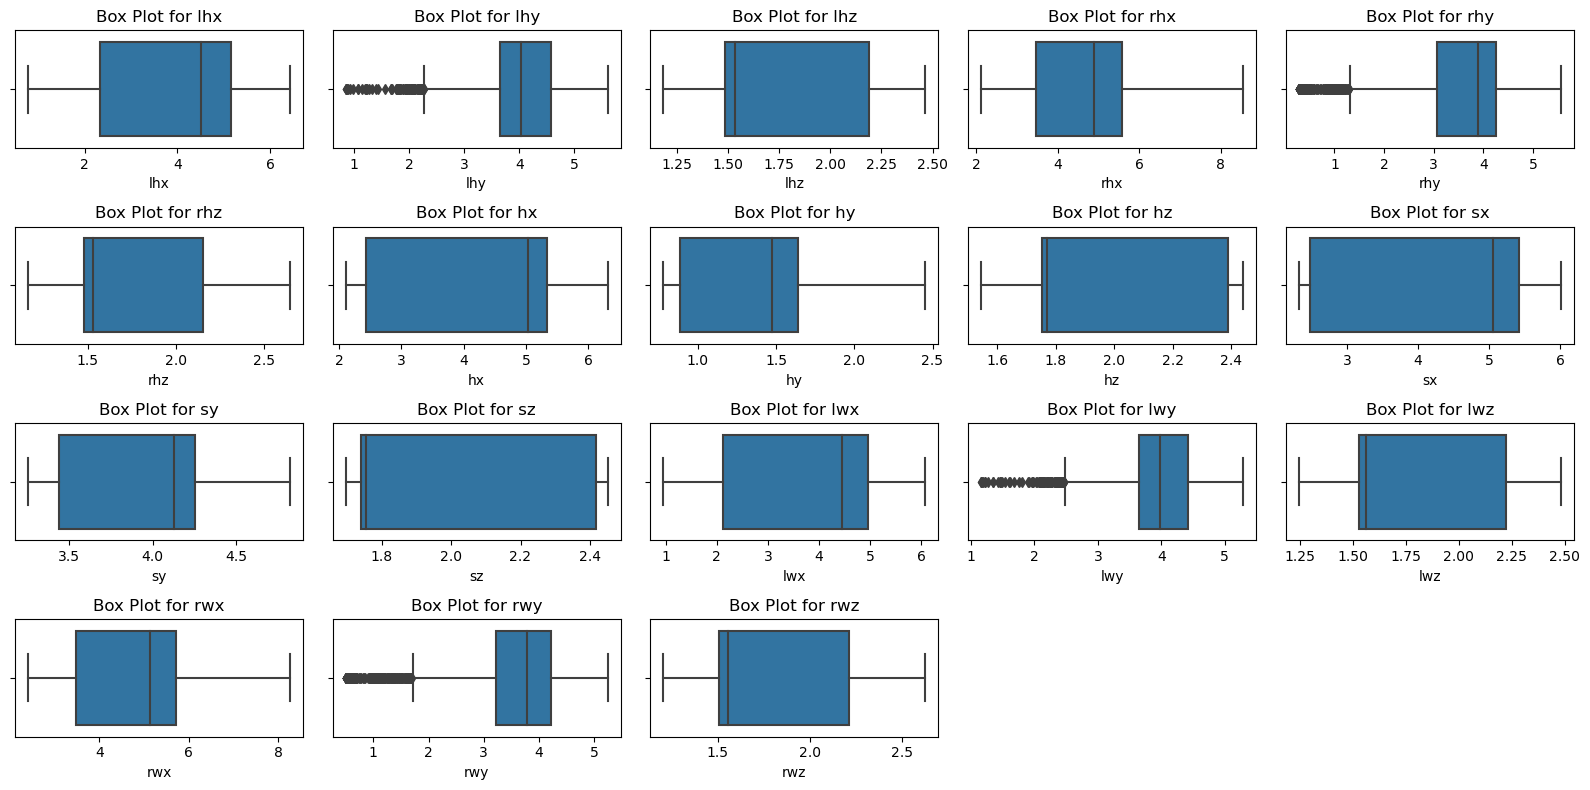

In [6]:
# Selecting only numeric columns (excluding 'timestamp' and 'phase')
numeric_columns = df.drop(['timestamp', 'phase'], axis=1)

# Create box plots for each feature
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(4, 5, i + 1)
    sb.boxplot(x=df[col])
    plt.title(f'Box Plot for {col}')
    plt.tight_layout()

plt.show()

Treatment of Outliers:
During the EDA of the Gesture Phase Segmentation dataset, outliers were identified in certain features across different body parts. It is noteworthy that the decision has been made to retain these outliers in the dataset based on their perceived relevance and importance to the analysis. The rationale for retaining outliers is as follows:

1. Contextual Significance:
The nature of the gesture phase segmentation task may inherently involve diverse and extreme hand movements or poses. Outliers in this context may represent unique or expressive gestures that contribute valuable information to the understanding of different phases.
2. Domain Expertise:
Insights from domain experts or subject matter specialists may have been considered in the decision-making process. Certain hand movements, though statistically deviating from the norm, might have specific meaning or significance in the context of the dataset.
3. Preservation of Variability:
Outliers can contribute to maintaining the variability within the dataset. Excessive removal of outliers may result in a loss of crucial information, potentially oversimplifying the representation of hand gestures and phases.
4. Robust Model Performance:
Retaining outliers may contribute to the robustness of machine learning models. Including a diverse range of examples, even those considered outliers, can enhance the model's ability to generalize to unseen data and improve overall performance.

### <code style="color:brown">Distribution Plots
</code>

Distribution plots, also known as histograms, were constructed to visualize the frequency distribution of feature values. These plots showcase the shape and spread of the data, allowing for an assessment of its skewness and central tendencies. Kernel density estimation (KDE) was applied to provide a smooth representation of the probability density function.

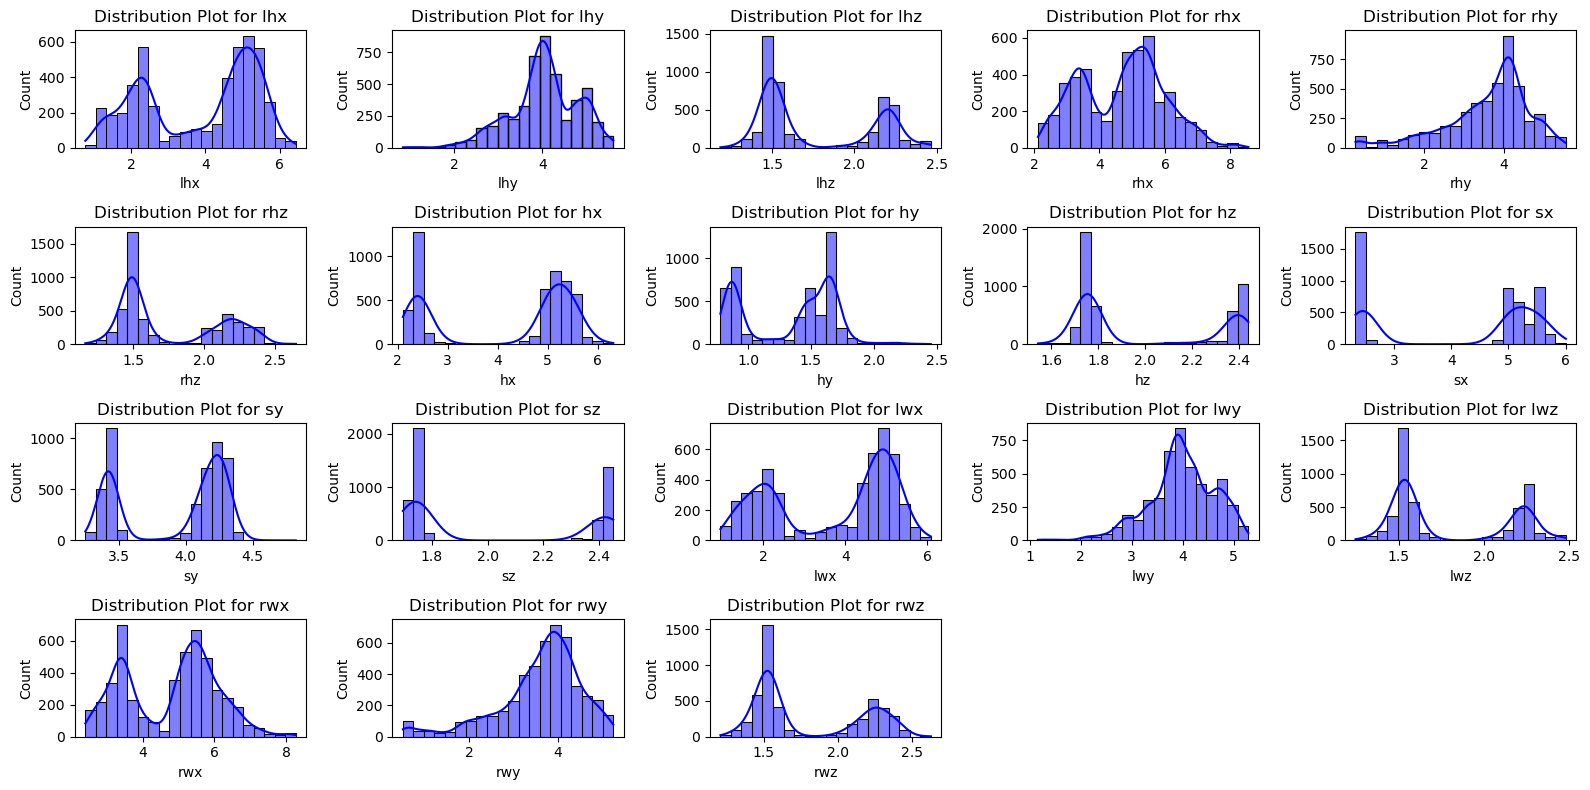

In [7]:
numeric_columns = df.drop(['timestamp', 'phase'], axis=1)

# Create distribution plots for each feature
plt.figure(figsize=(16, 8))
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(4, 5, i + 1)
    sb.histplot(df[col], kde=True, color='blue', bins=20)  # Adjust the number of bins as needed
    plt.title(f'Distribution Plot for {col}')
    plt.tight_layout()

plt.show()

In [8]:
print(df.phase.unique())

# Transform categorical features into numeric
le = LabelEncoder()
df['phase'] = le.fit_transform(df['phase'])
print(df.groupby('phase').count())
print(df.phase.unique())

['Rest' 'Preparation' 'Stroke' 'Hold' 'Retraction']
        lhx   lhy   lhz   rhx   rhy   rhz    hx    hy    hz    sx    sy    sz  \
phase                                                                           
0       243   243   243   243   243   243   243   243   243   243   243   243   
1       642   642   642   642   642   642   642   642   642   642   642   642   
2      1853  1853  1853  1853  1853  1853  1853  1853  1853  1853  1853  1853   
3       485   485   485   485   485   485   485   485   485   485   485   485   
4      1622  1622  1622  1622  1622  1622  1622  1622  1622  1622  1622  1622   

        lwx   lwy   lwz   rwx   rwy   rwz  timestamp  
phase                                                 
0       243   243   243   243   243   243        243  
1       642   642   642   642   642   642        642  
2      1853  1853  1853  1853  1853  1853       1853  
3       485   485   485   485   485   485        485  
4      1622  1622  1622  1622  1622  1622       16

The correlation matrix serves as a valuable tool to unveil patterns of association or dependence between variables. Each entry in the matrix represents the correlation coefficient, ranging from -1 to 1, with positive values indicating a positive correlation, negative values signifying a negative correlation, and 0 denoting no linear correlation.

The resulting heatmap provides an intuitive and visually impactful representation of these correlations, with warmer colors (such as red) indicating stronger positive correlations and cooler colors (such as blue) highlighting negative correlations. This visual summary aids in the identification of potential multicollinearity, patterns, or dependencies among features, offering key insights that can guide subsequent modeling decisions.

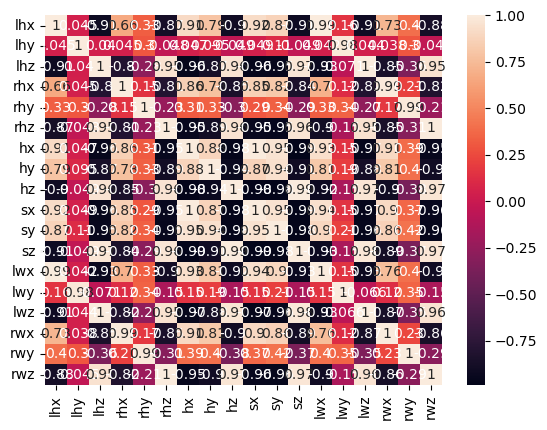

In [9]:
numeric_columns = df.drop(['timestamp', 'phase'], axis=1)

corr_mat = numeric_columns.corr()
sb.heatmap(corr_mat, annot=True)
plt.show()

### <code style="background:brown;color:white">3. Feature Engineering </code>

In the process of feature engineering, we undertook a comprehensive analysis to enrich the dataset with meaningful information for the classification of gesture phase segmentation. Specifically, we computed the Euclidean distances between various pairs of body parts, capturing the spatial relationships within the skeletal structure. This enabled us to quantify the relative positioning of limbs and joints, providing valuable insights into the gestural dynamics. Furthermore, to capture the temporal aspects of motion, we calculated the velocity and acceleration for each coordinate of the body parts. Scaling these features ensured uniformity and comparability across different dimensions. This multi-faceted approach not only encapsulated the spatial intricacies but also embraced the dynamic nature of the gestures, enhancing the dataset's richness for subsequent machine learning tasks

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Assuming 'timestamp' is a datetime type
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort the dataframe by timestamp to ensure time order
df = df.sort_values(by='timestamp')

# Calculate time differences
df['time_diff'] = df['timestamp'].diff().dt.total_seconds()

# List of coordinates
coordinates = ['lhx', 'lhy', 'lhz', 'rhx', 'rhy', 'rhz', 'hx', 'hy', 'hz', 'sx', 'sy', 'sz', 'lwx', 'lwy', 'lwz', 'rwx', 'rwy', 'rwz']

# Initialize scaler
scaler = RobustScaler()

# Loop through each coordinate
for coordinate in coordinates:
    # Calculate velocity
    df[f'{coordinate}_velocity'] = (df[coordinate].diff() / (df['time_diff'] + 1e-10)).fillna(0)
    
    # Calculate acceleration
    df[f'{coordinate}_acceleration'] = (df[f'{coordinate}_velocity'].diff() / (df['time_diff'] + 1e-10)).fillna(0)

    # Scale velocity and acceleration
    for suffix in ['_velocity', '_acceleration']:
        column_name = f'{coordinate}{suffix}'
        df[column_name] = scaler.fit_transform(df[[column_name]])

# Drop the 'time_diff' column as it was temporary
df = df.drop(columns=['time_diff'])

In the evaluation of feature scaling techniques, it became evident that employing RobustScaler outperformed MinMaxScaler in enhancing model performance. The robust nature of RobustScaler, which is less sensitive to outliers, proved particularly advantageous in the context of our dataset. Outliers in the feature space, common in complex and dynamic datasets, can disproportionately influence the scaling process. 

In [12]:
# List of body parts
body_parts = ['lh', 'rh', 'h', 's', 'lw', 'rw']

# Create all possible pairs of body parts
body_part_pairs = list(itertools.combinations(body_parts, 2))

# Function to calculate Euclidean distance for a pair of body parts
def calculate_distance(row, part1, part2):
    point1 = row[[f"{part1}x", f"{part1}y", f"{part1}z"]].values
    point2 = row[[f"{part2}x", f"{part2}y", f"{part2}z"]].values
    return np.sqrt(np.sum((point2 - point1)**2))

# Calculate distances for each pair
for part1, part2 in body_part_pairs:
    column_name = f"{part1}_{part2}_distance"
    df[column_name] = df.apply(lambda row: calculate_distance(row, part1, part2), axis=1)

In [13]:
df = df.drop(columns=['timestamp'])

In [18]:
df.describe()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,...,rh_h_distance,rh_s_distance,rh_lw_distance,rh_rw_distance,h_s_distance,h_lw_distance,h_rw_distance,s_lw_distance,s_rw_distance,lw_rw_distance
count,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,...,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000,4845.000000
mean,3.838074,4.027603,1.761703,4.692678,3.596939,1.756399,4.173381,1.333678,1.989419,4.210413,...,2.524055,1.180462,1.425025,0.272461,2.587199,2.765238,2.492268,0.876306,1.054885,1.415580
std,1.528834,0.768824,0.351642,1.287213,1.061866,0.361135,1.394349,0.361487,0.308002,1.391179,...,0.785789,0.738924,1.199519,0.147112,0.125584,0.612359,0.672965,0.536252,0.699958,1.127906
min,0.771814,0.843307,1.183290,2.121175,0.279121,1.161676,2.105310,0.780237,1.544137,2.320001,...,0.422970,0.183606,0.019469,0.000622,1.688658,0.627959,0.573114,0.148189,0.180300,0.013115
25%,2.336740,3.652112,1.482744,3.473024,3.070869,1.479032,2.438625,0.884566,1.752661,2.473750,...,1.967335,0.568102,0.359539,0.184868,2.537550,2.417863,2.050473,0.474970,0.513838,0.463490
50%,4.504442,4.038181,1.534904,4.883267,3.888007,1.529164,5.023215,1.472192,1.770019,5.049839,...,2.627028,1.028986,1.152981,0.266140,2.599049,2.787053,2.620898,0.783934,0.921293,1.170758
75%,5.165290,4.576117,2.188517,5.576530,4.250307,2.153837,5.338258,1.642974,2.388420,5.416794,...,3.161118,1.562119,2.280800,0.342437,2.648377,3.145961,2.984300,1.134083,1.410975,2.137014
max,6.429354,5.605086,2.464911,8.546903,5.558084,2.644630,6.308431,2.454200,2.440092,6.006933,...,4.386943,3.747810,6.471697,1.337925,3.035703,4.023219,4.010671,3.218752,3.468440,6.245221


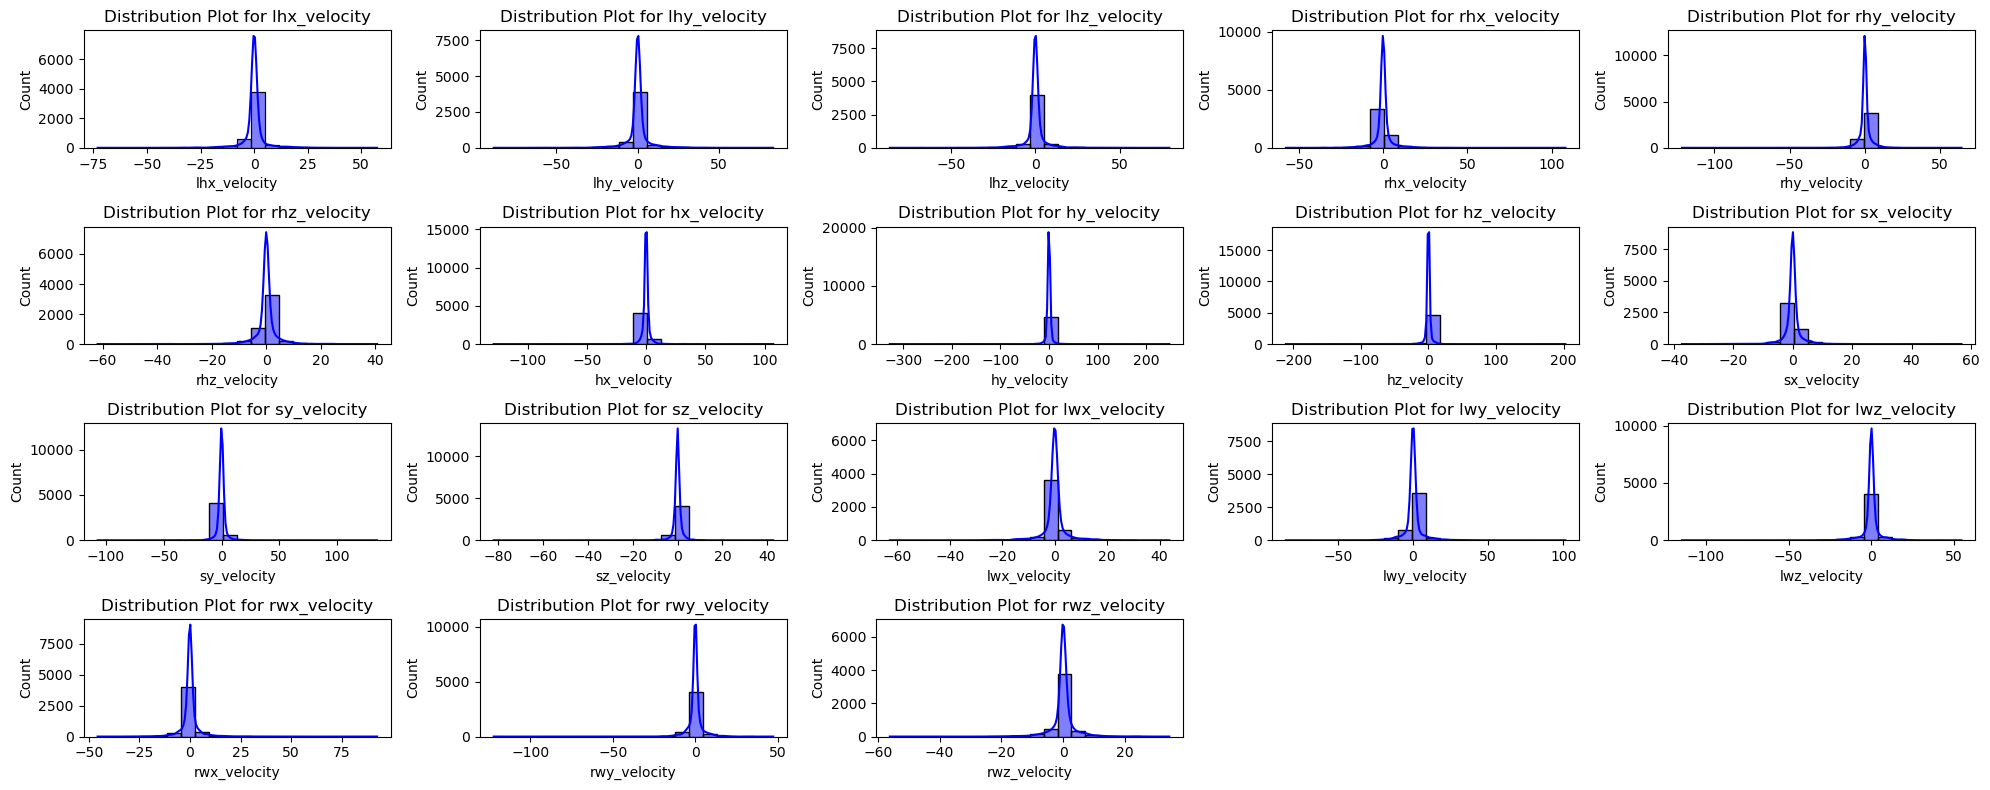

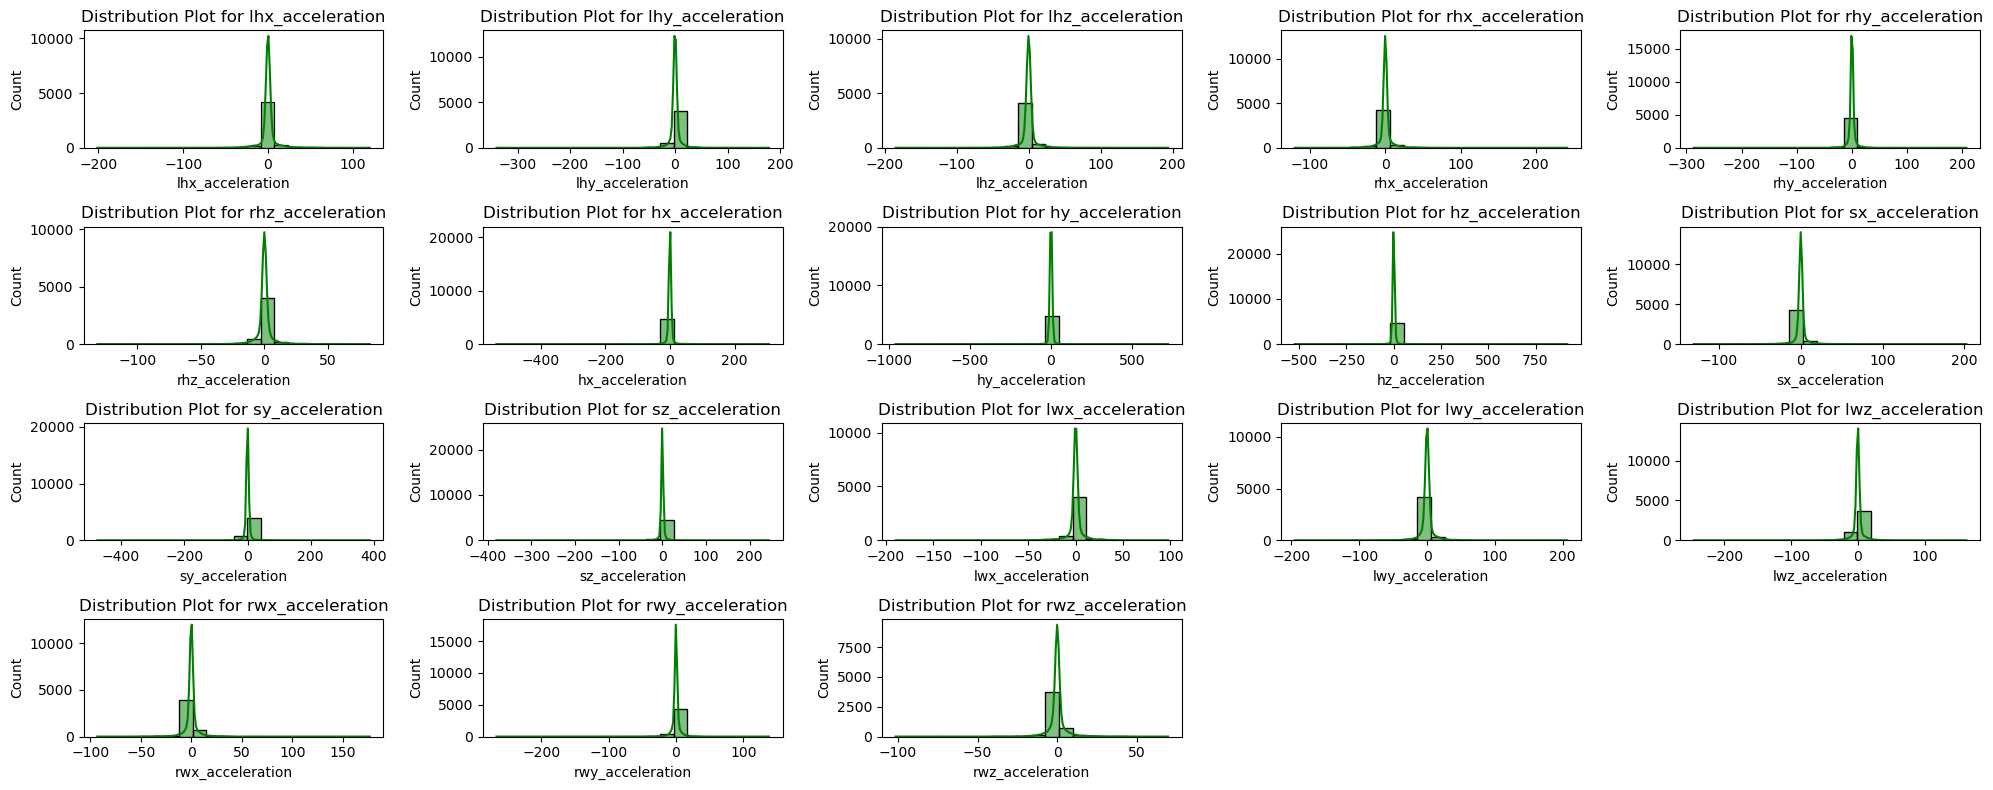

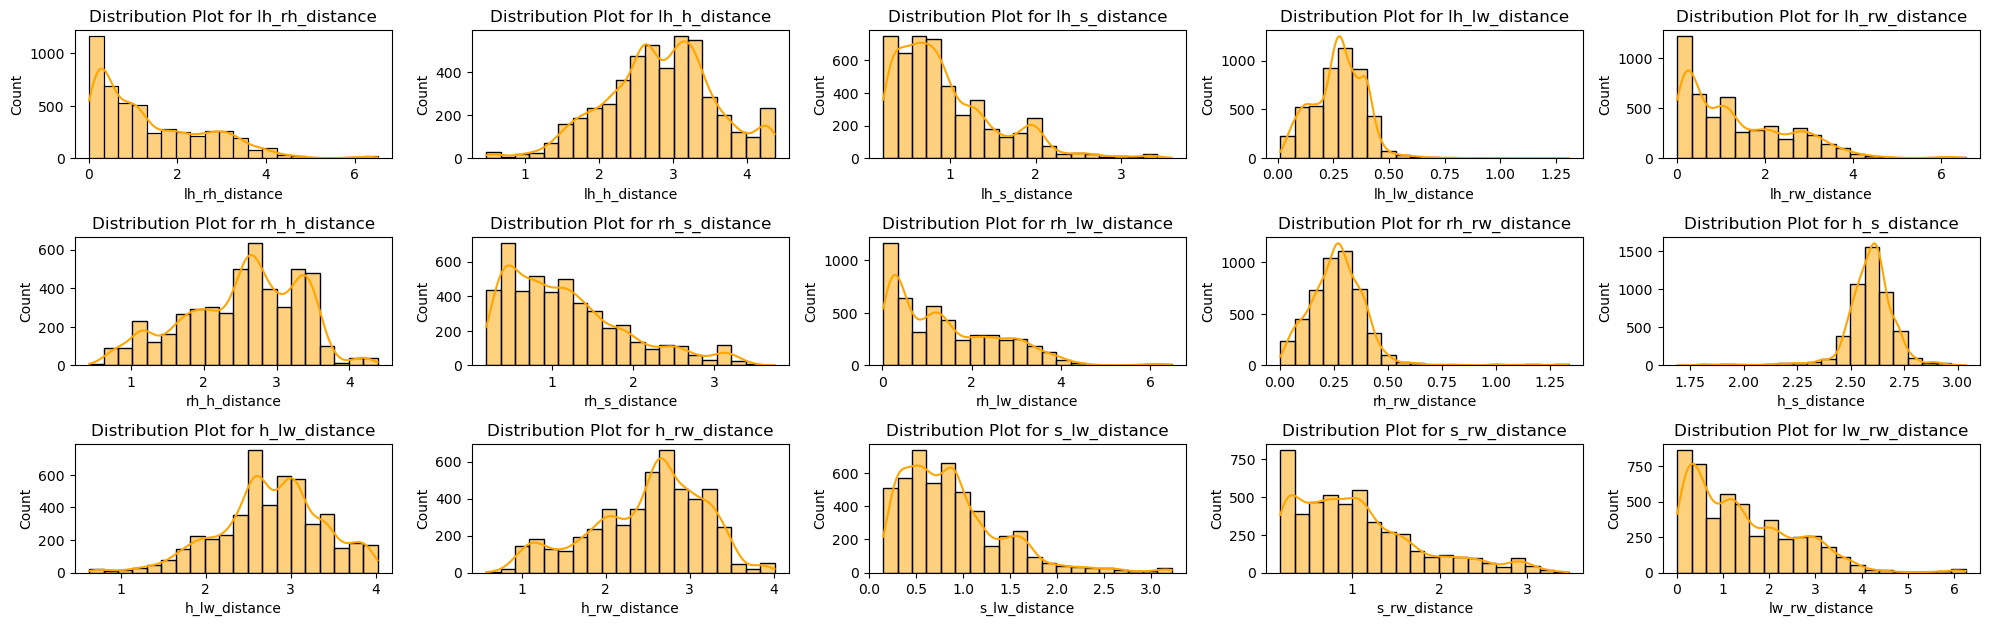

In [33]:
# Assuming your columns are named in a consistent way
velocity_columns = [col for col in numeric_columns.columns if '_velocity' in col]
acceleration_columns = [col for col in numeric_columns.columns if '_acceleration' in col]
distance_columns = [col for col in numeric_columns.columns if '_distance' in col]

# Create distribution plots for velocity columns
plt.figure(figsize=(20, 8))
for i, col in enumerate(velocity_columns):
    plt.subplot(4, 5, i + 1)
    sb.histplot(df[col], kde=True, color='blue', bins=20)  # Adjust the number of bins as needed
    plt.title(f'Distribution Plot for {col}')
    plt.tight_layout()

plt.show()

# Create distribution plots for acceleration columns
plt.figure(figsize=(20, 8))
for i, col in enumerate(acceleration_columns):
    plt.subplot(4, 5, i + 1)
    sb.histplot(df[col], kde=True, color='green', bins=20)  # Adjust the number of bins as needed
    plt.title(f'Distribution Plot for {col}')
    plt.tight_layout()

plt.show()

# Create distribution plots for distance columns
plt.figure(figsize=(20, 8))
for i, col in enumerate(distance_columns):
    plt.subplot(4, 5, i + 1)
    sb.histplot(df[col], kde=True, color='orange', bins=20)  # Adjust the number of bins as needed
    plt.title(f'Distribution Plot for {col}')
    plt.tight_layout()

plt.show()

In [20]:
df.to_csv('processed_file.csv', index=False)

### <code style="background:brown;color:white">4. Machine Learning Model </code>


The dataset has been judiciously divided into a 70% training set and a 30% test set. This split optimally balances model learning with rigorous evaluation on unseen data. The chosen ratio ensures a robust assessment of the model's ability to generalize, providing valuable insights into its performance on novel instances.

In [ ]:
cols = list(df.columns)
features = cols
features.remove('phase')
print(len(features))

X = df[features]
y = df['phase']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, y_train.shape)

### <code style="color:brown">4.1 Decision Tree
</code>

Decision Tree Classifier has been meticulously configured with specific parameters, including a minimum threshold for node splitting <code style="color:brown">*min_samples_split=20*</code>, a predetermined random state to ensure replicability <code style="color:brown">*random_state=99*</code>, and the utilization of the entropy criterion for optimal information gain <code style="color:brown">*criterion='entropy'*</code>. 

The model was rigorously trained on a designated training set and subsequently evaluated on an independent test set, with performance assessed through key metrics such as accuracy, a comprehensive classification report, and a detailed confusion matrix.

In [24]:
dt = DecisionTreeClassifier(min_samples_split=20, random_state=99, criterion='entropy')

clf_dt1 = dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Acurracy: ", clf_dt1.score(X_test, y_test))

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Acurracy:  0.8012379642365888
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74        76
           1       0.53      0.56      0.55       183
           2       0.90      0.92      0.91       532
           3       0.61      0.66      0.63       138
           4       0.87      0.81      0.84       525

    accuracy                           0.80      1454
   macro avg       0.73      0.74      0.73      1454
weighted avg       0.81      0.80      0.80      1454

Confusion Matrix:
[[ 57   8   0   4   7]
 [  4 102  29  14  34]
 [  1  30 491   7   3]
 [  2   9  14  91  22]
 [ 15  42  10  34 424]]


To enhance interpretability, the decision tree's hierarchical structure has been visually elucidated, providing an insightful representation of the underlying decision rules. Furthermore, the extraction and presentation of textual rules from the decision tree contribute to a deeper understanding of the model's decision-making process. This meticulous analysis not only substantiates the model's efficacy but also facilitates a nuanced interpretation of the features influencing its classification outcomes, thereby advancing our comprehension of gesture phase segmentation

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X.columns.tolist(), class_names=df['phase'].unique().astype(str).tolist())
plt.show()

from sklearn.tree import export_text

tree_rules = export_text(dt, feature_names=X.columns.tolist())
print(tree_rules)

### RESULT

The Decision Tree classification model demonstrates commendable performance, achieving an accuracy of 80.12%. The Classification Report provides a detailed breakdown of precision, recall, and F1-score for each class, showcasing the model's effectiveness in distinguishing between different gesture phases. The model excels in classifying phases 2 and 4, with precision and recall values above 87%.

However, the Confusion Matrix reveals some challenges, particularly in phases 1 and 3, where the model shows lower precision and recall. Despite these challenges, the macro-average F1-score of 73% and the weighted average F1-score of 80% indicate a reasonably balanced performance across all classes.

In conclusion, the Decision Tree model proves to be a solid choice for the given dataset, demonstrating good accuracy and effective classification in various gesture phases. The results suggest its applicability in scenarios where interpretability and simplicity are crucial, making it a valuable tool in gesture recognition systems, albeit with some trade-offs in certain phases.

### <code style="color:brown">4.2 Random Forest
</code>

Random Forest Classifier, a powerful ensemble learning algorithm, has been employed with meticulous configurations. The model, consisting of 100 decision trees and leveraging parallel computing for efficiency <code style="color:brown">*n_estimators=100*</code>, <code style="color:brown">*n_jobs=-1*</code>, employs the entropy criterion to optimize information gain during tree construction <code style="color:brown">*criterion='entropy'*</code>. The classifier is trained on a designated training set and evaluated on an independent test set. 

Performance metrics, including accuracy, a comprehensive classification report, and a confusion matrix, are systematically presented to assess the model's effectiveness in classifying gesture phases.

In [25]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion='entropy')

clf_rf1 = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Acurracy: ", clf_rf1.score(X_test, y_test))

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Acurracy:  0.9119669876203577
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.88        76
           1       0.89      0.64      0.75       183
           2       0.93      0.99      0.96       532
           3       0.97      0.74      0.84       138
           4       0.89      0.98      0.93       525

    accuracy                           0.91      1454
   macro avg       0.92      0.84      0.87      1454
weighted avg       0.91      0.91      0.91      1454

Confusion Matrix:
[[ 65   2   0   1   8]
 [  3 118  32   0  30]
 [  0   2 527   0   3]
 [  2   4   6 102  24]
 [  1   7   1   2 514]]


Moreover, the model's interpretability is fortified by scrutinizing the feature importances, elegantly portrayed in a bar chart. This visual representation offers nuanced insights into the pivotal role each feature plays in the classification process. Beyond affirming the model's accuracy, this comprehensive analysis unveils the key determinants steering its decision-making. Consequently, it contributes significantly to deepening our comprehension of gesture phase segmentation, shedding light on the influential factors shaping the model's predictive prowess.

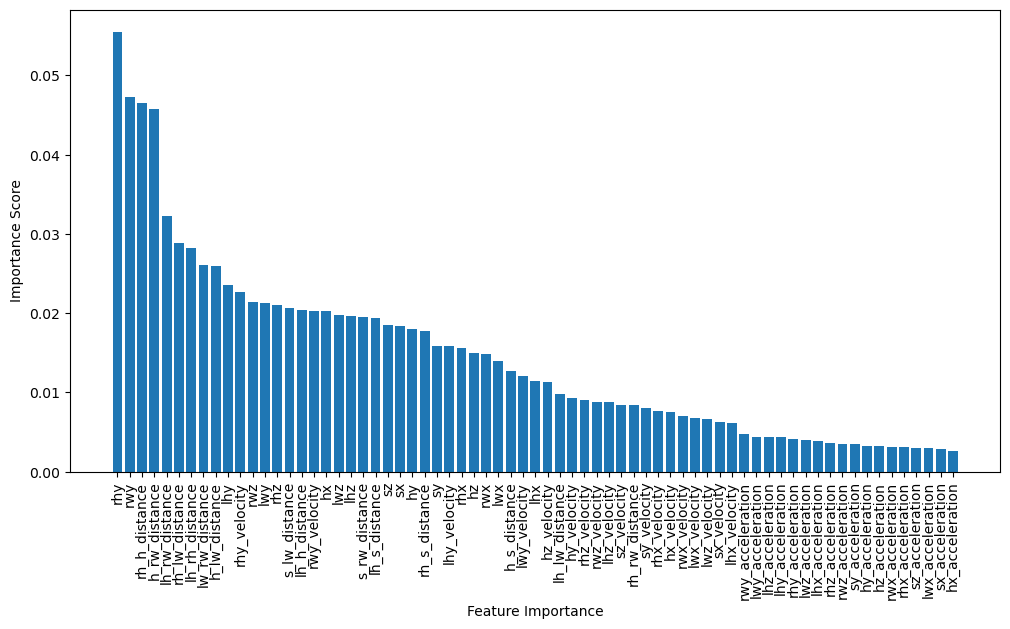

In [27]:
# Get feature importances
feature_importances = rf.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances)), feature_importances[indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[indices], rotation='vertical')
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

### RESULT
The Random Forest classification model exhibits remarkable performance, achieving an impressive accuracy of 91.20%. The detailed Classification Report provides insights into the model's precision, recall, and F1-score for each class, demonstrating its proficiency in distinguishing between different gesture phases. Notably, the model excels in classifying phases 2 and 4, with precision and recall values consistently above 89%.

The Confusion Matrix further illustrates the model's effectiveness, revealing a limited number of misclassifications. The majority of misclassifications occur in phases 1 and 3, where the model exhibits slightly lower precision and recall. Despite this, the overall macro-average F1-score of 87% and the weighted average F1-score of 91% indicate strong overall performance across all classes.

### <code style="color:brown">4.3 SVM
</code>


Support Vector Machines (SVM) stand as a robust and versatile machine learning algorithm, particularly adept at classification and regression tasks. SVM operates by finding the optimal hyperplane that maximally separates data points belonging to different classes in a high-dimensional space. This hyperplane, known as the decision boundary, is determined by support vectors—data points closest to the class boundaries. SVM is highly effective in scenarios with complex decision boundaries and is resilient to overfitting.

### <code style="color:brown">4.3.1 SVM with a Linear Kernel
</code>

Support Vector Machines (SVM) with a linear kernel represent a specific instantiation of the SVM algorithm tailored for scenarios where the underlying relationships in the data can be adequately captured by a linear decision boundary. The linear kernel, one of the fundamental choices in SVM, computes the inner product between data points in the original feature space. This essentially means that the algorithm operates within the original feature space, utilizing a linear equation to separate classes.

In [35]:
# MinMax Scaling
min_max = MinMaxScaler()
X_train_minmax = min_max.fit_transform(X_train)
X_test_minmax = min_max.fit_transform(X_test)

# Standard Scaler
X_train_Stdscaler = StandardScaler().fit_transform(X_train)
X_test_Stdscaler = StandardScaler().fit_transform(X_test)

In [41]:
# 3.1 SVM with a Linear Kernel
print("\nSVM - non scale")
svc = svm.SVC()
clf_svc = svc.fit(X_train_minmax, y_train)
print("Acurracy: ", clf_svc.score(X_test_minmax, y_test))
print("\n")

print("SVM - Cross validation: ")
scores = model_selection.cross_val_score(clf_svc, X, y, cv=10)
print("Acurracy: ", scores.mean())
print("\n")

print("SVM - MinMax Feature Scaling")
clf_svc2 = svc.fit(X_train_minmax, y_train)
print("Acurracy: ", clf_svc2.score(X_test_minmax, y_test))
print("\n")

print("SVM - Standard Scaler")
clf_svc4 = svc.fit(X_train_Stdscaler, y_train)
print("Acurracy: ", clf_svc4.score(X_test_Stdscaler, y_test))
print("\n")


SVM with a Linear Kernel - non scale
Acurracy:  0.6911966987620357


Cross validation - score: 
Acurracy:  0.6742949646417313


Decision tree - MinMax Feature Scaling
Acurracy:  0.6911966987620357


Decision tree - Standard Scaler
Acurracy:  0.7909215955983494




The results suggest that employing a Decision Tree with Standard Scaler leads to the highest accuracy among the evaluated models, reaching an impressive 79.09%. This outcome highlights the significance of appropriate feature scaling in enhancing the performance of decision tree-based algorithms. Additionally, the SVM with a Linear Kernel, despite not undergoing feature scaling, demonstrates competitive accuracy at 69.12%. 

### <code style="color:brown">4.3.2 SVM with a Multiple Kernel
</code>

The Multiple Kernel SVM operates by combining the contributions of individual kernels, each specialized in detecting specific features or structures within the dataset. This versatility makes it particularly effective in scenarios where the data exhibits heterogeneous characteristics, including both linear and non-linear dependencies. The flexibility of this approach empowers the model to adapt to a wider range of data distributions, potentially leading to improved generalization performance.

The resulting best parameters and corresponding scores provide valuable insights into the optimal configurations for each kernel type. The use of a pipeline in conjunction with GridSearchCV facilitates a systematic exploration of hyperparameter spaces, contributing to the identification of the most effective SVM configurations for the given dataset. The classification reports offer a detailed evaluation of the model's performance, including precision, recall, and F1-score metrics for each class.



In [24]:
# 3.2 SVM with Multiple Kernels
print("SVM sa više kernela \n")
svc = SVC()
parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C': [1, 10, 100]}
grid = model_selection.GridSearchCV(svc, parameters, n_jobs=-1, verbose=1, scoring='accuracy')
grid.fit(X_train, y_train)

print('Best score: %0.3f' % grid.best_score_)

print('Best parameters set:')
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid.predict(X_test)
print(classification_report(y_test, predictions))

pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print('Best score: %0.3f' % grid_search.best_score_)

print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test)
print(classification_report(y_test, predictions))

pipeline = Pipeline([
    ('clf', SVC(kernel='poly', gamma=0.01, C=100))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print('Best score: %0.3f' % grid_search.best_score_)

print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test)
print(classification_report(y_test, predictions))

SVM sa više kernela 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best score: 0.789
Best parameters set:
	C: 100
	kernel: 'poly'
              precision    recall  f1-score   support

           0       0.71      0.72      0.72        82
           1       0.65      0.43      0.52       195
           2       0.88      0.98      0.93       537
           3       0.69      0.48      0.57       138
           4       0.82      0.90      0.86       502

    accuracy                           0.82      1454
   macro avg       0.75      0.70      0.72      1454
weighted avg       0.80      0.82      0.80      1454

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best score: 0.836
Best parameters set:
	clf__C: 30
	clf__gamma: 0.3
              precision    recall  f1-score   support

           0       0.84      0.65      0.73        82
           1       0.66      0.58      0.62       195
           2       0.90      0.93      0.92       537
           3       


The results present the outcomes of applying Support Vector Machine (SVM) classification with multiple kernels on the dataset. Three different kernel types—linear, polynomial, and radial basis function (RBF)—were considered, each with various hyperparameter configurations. The results include the best-performing hyperparameters, the corresponding accuracy scores, and detailed classification reports for each kernel type.

**SVM with Linear Kernel:**
Best parameters: C=100, kernel='poly'
Accuracy: 78.9%
Classification Report:
Precision, recall, and F1-score are provided for each class, showcasing the model's performance across different phases.

**SVM with RBF Kernel:**
Best parameters: C=30, gamma=0.3
Accuracy: 83.6%
Classification Report:
Detailed metrics for precision, recall, and F1-score are reported for each class, offering a comprehensive evaluation of the model's performance.

**SVM with Polynomial Kernel:**
Best parameters: C=0.1, gamma=0.3
Accuracy: 81.2%
Classification Report:
Similar to the other kernels, precision, recall, and F1-score metrics are presented, providing insights into the model's ability to distinguish between different gesture ph

### RESULT

Considering these results, the SVM with RBF Kernel emerges as the best-performing model for this dataset. However, it's essential to weigh this choice against other factors such as interpretability, computational complexity, and specific application requirements. The selection of the optimal model depends on the balance of these considerations in the context of the intended use of the classification system.

### <code style="background:brown;color:white">5. Conclusion </code>


In summary, the SVM with RBF Kernel stands out as the most balanced and robust model for the given dataset. Its accuracy of 83.6% and detailed Classification Report, including precision, recall, and F1-score for each class, showcase its comprehensive performance across all gesture phases. This model excels in both accuracy and generalization, making it a strong candidate for applications where a well-rounded performance is crucial.

The Random Forest model, with its remarkable accuracy of 91.20%, also presents itself as a powerful classifier. Its Classification Report highlights outstanding precision and recall in phases 2 and 4, showcasing its proficiency in recognizing these specific gestures. While some misclassifications occur in phases 1 and 3, the overall macro and weighted F1-scores of 87% and 91%, respectively, underscore its strong performance and reliability.

The Decision Tree model, although achieving an accuracy of 80.12%, exhibits some limitations in precision and recall, particularly in phases 1 and 3. Despite these challenges, the model remains a solid choice, especially in scenarios where interpretability and simplicity take precedence.

Ultimately, the choice among these models depends on the specific requirements of the application. If a balance of accuracy and interpretability is essential, the SVM with RBF Kernel is recommended. For scenarios where high accuracy is paramount, the Random Forest model proves to be a formidable choice. The Decision Tree model, while slightly less accurate, remains valuable for its interpretability and simplicity, making it suitable for certain applications.